# Life Expectancy and GDP Data

In [16]:
# Import dependencies
import pandas as pd
import csv

In [17]:
# Read csv file
lg_df = pd.read_csv('all_data.csv')
lg_df

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [18]:
# Display data information
lg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [19]:
# Rename column for cleanliness and clarity
lg_df = lg_df.rename(columns={"Life expectancy at birth (years)": "Life Expectancy"})
lg_df.head()

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [20]:
# Display all the countries in the DataFrame
countries = lg_df["Country"].unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [21]:
# Display all the countries in the DataFrame
years = lg_df["Year"].unique()
print(years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


# Graph Analysis

In [24]:
# Import dependencies
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
# Import dependencies
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st
import seaborn as sns

## Has life expectancy increased over time in the six countries?

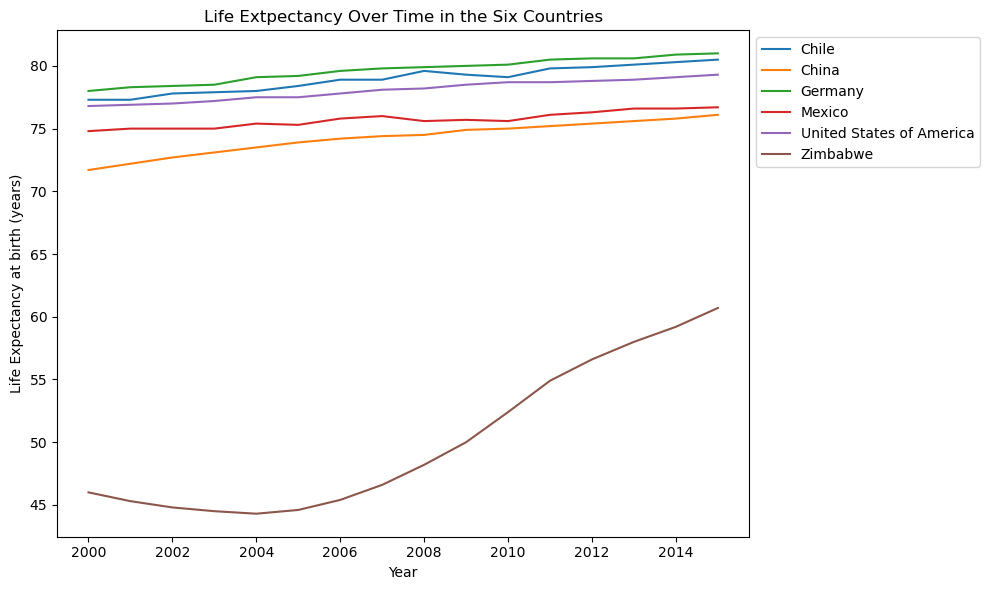

In [26]:
# Use line graph to display life expectancy over time in the six countries
plt.figure(figsize=(10,6))

sns.lineplot(data=lg_df, x="Year", y="Life Expectancy", hue="Country")

plt.xlabel("Year")
plt.ylabel("Life Expectancy at birth (years)")
plt.title(f"Life Extpectancy Over Time in the Six Countries")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.savefig("Images/life_expectancy_ot.png", bbox_inches="tight")

plt.tight_layout()
plt.show()

This graph illustrates the changes in life expectancy over 15 years (2000-2015) for the six analyzed countries.

Upon examining the Life Expectancy patterns in the six countries, it becomes evident that they all follow a general upward trend over time. In particular, Chile and Mexico display a sporadic decline in 2010, followed by subsequent recoveries in Life Expectancy. To uncover the reasons for these declines, a more in-depth examination of the contributing factors is warranted. In contrast, Zimbabwe distinguishes from the other countries, displaying the most significant upswing in Life Expectancy, increasing from approximately 45 years to 60 years (marking the most substantial improvement). The remaining countries exhibit a steady overall increase in Life Expectancy.

# Has GDP increased over time in the six countries?

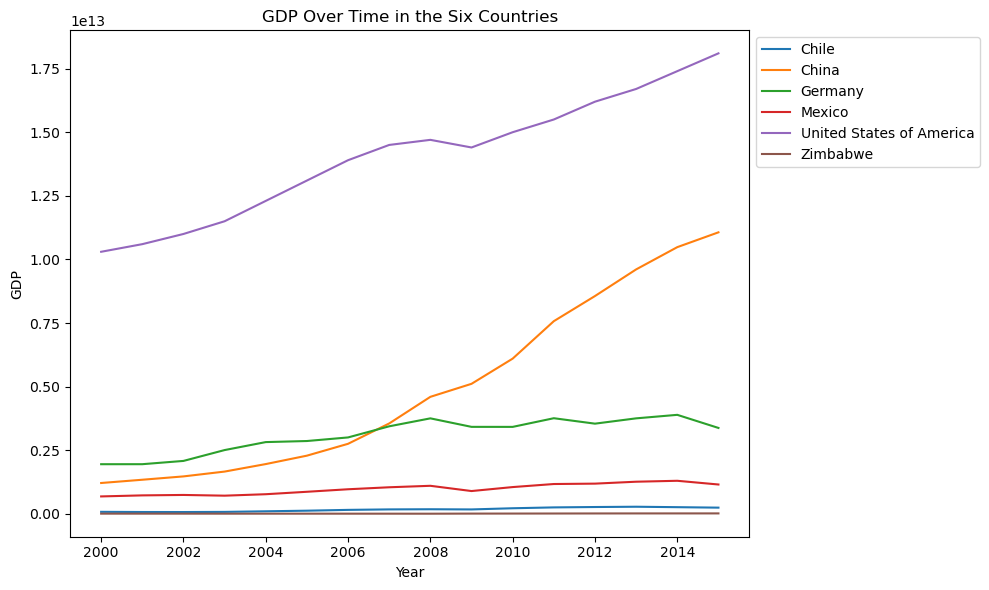

In [27]:
# Use line graph to display GDP over time in the six countries
plt.figure(figsize=(10,6))

sns.lineplot(data=lg_df, x="Year", y="GDP", hue="Country")

plt.xlabel("Year")
plt.ylabel("GDP")
plt.title(f"GDP Over Time in the Six Countries")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.savefig("Images/gdp_ot.png", bbox_inches="tight")

plt.tight_layout()
plt.show()

This graph depicts the fluctuations in GDP over 15 years (2000-2015) for the six analyzed countries.

Upon examining the GDP trends in these six countries, it becomes apparent that they have all experienced a rise in GDP over the years. China, in particular, has experienced the most steady upward trajectory without any apparent challenges in the economy. Subsequently, the United States displayed an upward trend in GDP, with a dip in 2008, which can be linked to the Great Depression and other factors that require further examination. Meanwhile, the other countries exhibit a more modest increase in their GDP levels over time.

# Is there a correlation between GDP and life expectancy of a country?

In [28]:
# Calculate the Correlation coefficient between GDP and Life Expectancy for each country
correlations = []

for country in lg_df["Country"].unique():
    gdp = lg_df.loc[lg_df["Country"] == country, "GDP"]
    life_exp = lg_df.loc[lg_df["Country"] == country, "Life Expectancy"]
    
    correlation = st.pearsonr(gdp, life_exp)
    print(f"The correlation coefficient for {country}: {round(correlation[0],2)}")

The correlation coefficient for Chile: 0.95
The correlation coefficient for China: 0.91
The correlation coefficient for Germany: 0.93
The correlation coefficient for Mexico: 0.93
The correlation coefficient for United States of America: 0.98
The correlation coefficient for Zimbabwe: 0.97


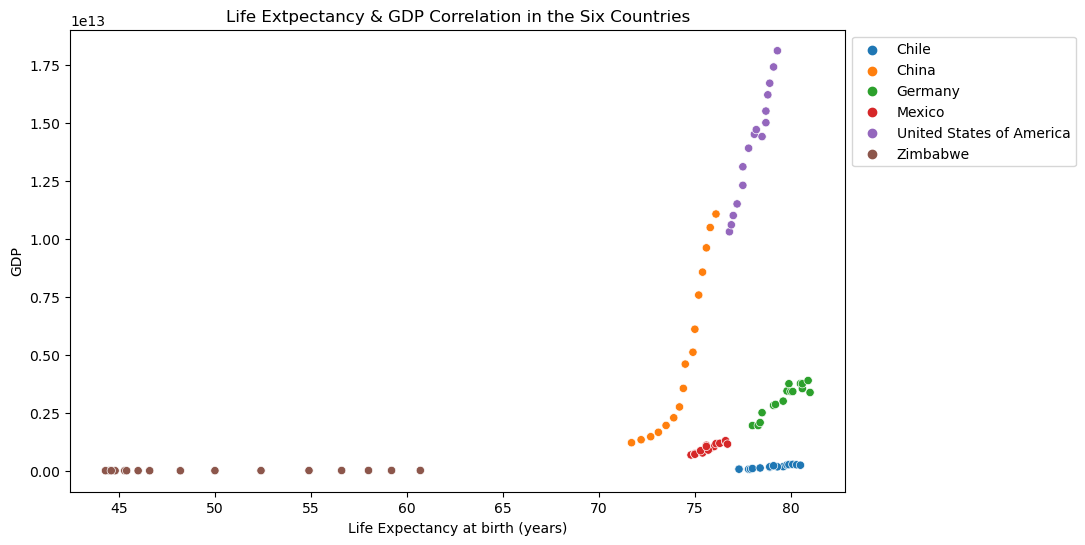

In [29]:
# Use scatter plot to display the correlation between GDP and Life Expectancy in the six countries
plt.figure(figsize=(10,6))

sns.scatterplot(data=lg_df, x="Life Expectancy", y="GDP", hue="Country", legend="full")
                    
plt.xlabel("Life Expectancy at birth (years)")
plt.ylabel("GDP")
plt.title(f"Life Extpectancy & GDP Correlation in the Six Countries")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.savefig("Images/correlation_1.png", bbox_inches="tight")

plt.show()

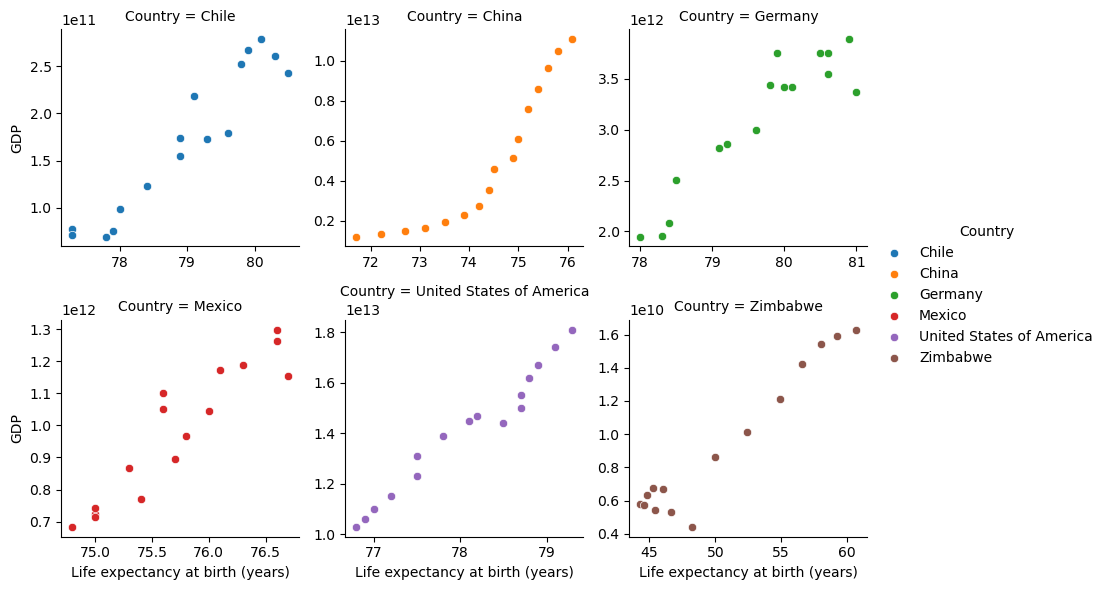

In [30]:
# Display the correlation scatter plot between GDP and Life Expectancy for each country separately
g = sns.FacetGrid(lg_df, col="Country", col_wrap=3, sharex=False, sharey=False, hue="Country",
                  height=3)

g.map(sns.scatterplot, "Life Expectancy", "GDP")

g.set_axis_labels("Life expectancy at birth (years)", "GDP")
g.add_legend()

plt.savefig("Images/correlation_6.png", bbox_inches="tight")

plt.show()

This scatter plot illustrates the correlation between Life Expectancy and GDP across the six countries.

Upon analyzing the correlation results for each country, it becomes evident that all of them exhibit a positive correlation coefficient ranging from 0.91 - 0.98. These results indicate that there is a strong positive relationship between Life Expectancy and GDP, which implies that an increase in one variable corresponds to a rise in the other. 

The graphs reveal linear/exponential relationships and exhibit a positive correlation between Life Expectancy and GDP for all the countries. Although Zimbabwe and Chile seem relatively flat in the initial graph, it is apparent that they still demonstrate a positive trend. Meanwhile, China and the United States display an even more pronounced relationship due to their exponential growth pattern.


# What is the average life expectancy in these nations?

In [31]:
# Calculate the average Life Expectancy for the six countries
for country in lg_df["Country"].unique():
    life_average = lg_df.loc[lg_df["Country"] == country, "Life Expectancy"].mean()
    print(f"The average Life Expectancy for {country}: {round(life_average,2)} years")

The average Life Expectancy for Chile: 78.94 years
The average Life Expectancy for China: 74.26 years
The average Life Expectancy for Germany: 79.66 years
The average Life Expectancy for Mexico: 75.72 years
The average Life Expectancy for United States of America: 78.06 years
The average Life Expectancy for Zimbabwe: 50.09 years


<Figure size 1000x600 with 0 Axes>

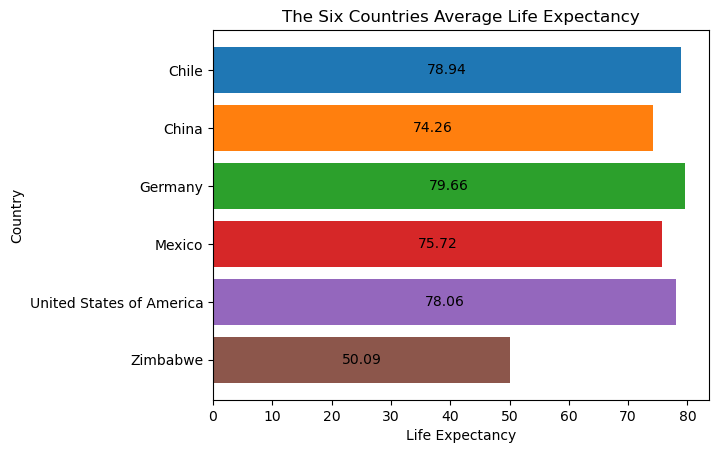

In [32]:
# Use bar plot to display the average Life Expectancy in the six countries
plt.figure(figsize=(10,6))

fig, axes = plt.subplots()

for country in lg_df["Country"].unique():
    life_average = lg_df.loc[lg_df["Country"] == country, "Life Expectancy"].mean()
    bar = axes.barh(country, life_average, align='center')
    axes.bar_label(bar, fmt='%.2f', label_type='center')
    
axes.invert_yaxis() 
axes.set_xlabel("Life Expectancy")
axes.set_ylabel("Country")
axes.set_title("The Six Countries Average Life Expectancy")

plt.savefig("Images/life_expectancy_mean.png", bbox_inches="tight")

plt.show()

This bar graph displays the average Life Expectancy for each country. 

Based on the observations, it is evident that most countries demonstrate an average Life Expectancy ranging between roughly 74 to 80 years, except for Zimbabwe. Zimbabwe, in contrast, displays the lowest average Life Expectancy at approximately 50 years. Further examination is required to explore the factors contributing to the substantial disparity between Zimbabwe and all the other countries.


# What is the distribution of that life expectancy?

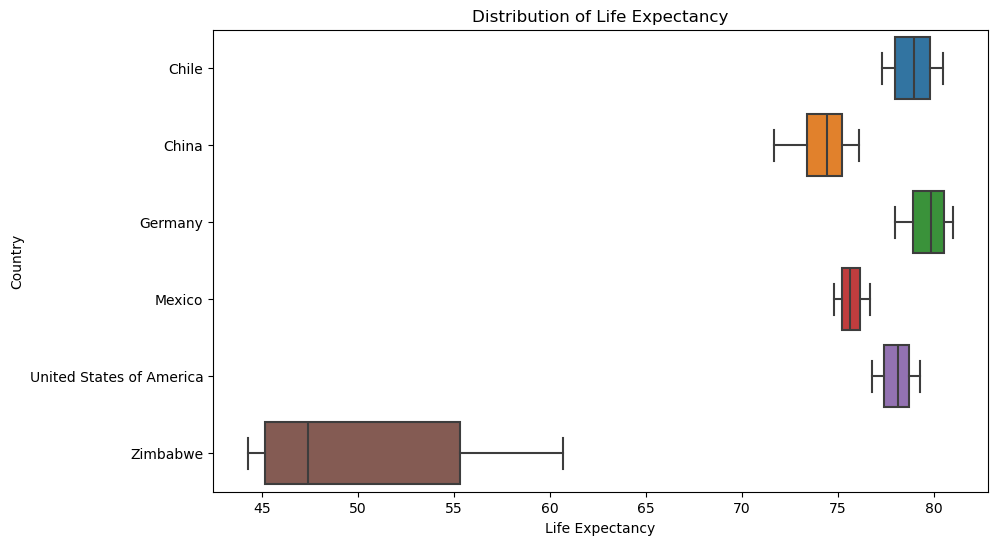

In [33]:
# Use box plot to display the distribution of Life Expectancy for the six countries
plt.figure(figsize=(10,6))

sns.boxplot(data=lg_df, x="Life Expectancy", y="Country")

plt.xlabel("Life Expectancy")
plt.title("Distribution of Life Expectancy")

plt.savefig("Images/life_expectancy_distribution.png", bbox_inches="tight")

plt.show()

This box plot illustrates the distribution of Life Expectancy across the six countries.

Upon examination, the first five countries exhibit a relatively consistent distribution without any 
outliers. This indicates a reduced degree of variability and greater uniformity in Life Expectancy years among these countries, implying a similarity in conditions influencing Life Expectancy. In contrast, Zimbabwe stands out as the only country displaying a broader distribution range, higher maximum whiskers, and no presence of outliers. Furthermore, Zimbabwe’s median line is closer to the first quartile which suggests a concentration of values towards the lower end of Life Expectancy years. Overall, the lower mean, median, and extended distribution range for Zimbabwe highlights the need to consider additional factors in our analysis.